In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('bank-marketing.csv')

In [3]:
df

,age,job,salary,marital,education,targeted,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,response
0,58,management,100000,married,tertiary,yes,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,60000,single,secondary,yes,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,120000,married,secondary,yes,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,20000,married,unknown,no,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,0,single,unknown,no,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,60000,married,tertiary,yes,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,55000,divorced,primary,yes,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,55000,married,secondary,yes,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,20000,married,secondary,yes,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no


In [4]:
df.head()

,age,job,salary,marital,education,targeted,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,response
0,58,management,100000,married,tertiary,yes,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,60000,single,secondary,yes,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,120000,married,secondary,yes,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,20000,married,unknown,no,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,0,single,unknown,no,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [5]:
df.describe()

,age,salary,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,57006.171065,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,32085.718415,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,0.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,20000.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,60000.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,70000.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,120000.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [6]:
df.isna().sum()

age          0
job          0
salary       0
marital      0
education    0
targeted     0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
response     0
dtype: int64

Describe the pdays column, make note of the mean, median and minimum values. Anything fishy in the values?

In [7]:
df.pdays.describe()

count    45211.000000
mean        40.197828
std        100.128746
min         -1.000000
25%         -1.000000
50%         -1.000000
75%         -1.000000
max        871.000000
Name: pdays, dtype: float64

In [8]:
# finding mean,median,minimum
print(df.pdays.mean())
print(df.pdays.median())
print(df.pdays.min())

40.19782796222158
-1.0
-1


-From the above values we can see that, the pdays has the negative value

-pdays means, number of days that passed by after the client was last contacted from previous campaign

-But, days can not be negative

Describe the pdays column again, this time limiting yourself to the relevant values of pdays. How different are the mean and the median values?

In [9]:
npdays=df[df.pdays>0]

In [10]:
npdays

,age,job,salary,marital,education,targeted,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,response
24060,33,admin.,50000,married,tertiary,yes,no,882,no,no,telephone,21,oct,39,1,151,3,failure,no
24062,42,admin.,50000,single,secondary,yes,no,-247,yes,yes,telephone,21,oct,519,1,166,1,other,yes
24064,33,services,70000,married,secondary,yes,no,3444,yes,no,telephone,21,oct,144,1,91,4,failure,yes
24072,36,management,100000,married,tertiary,yes,no,2415,yes,no,telephone,22,oct,73,1,86,4,other,no
24077,36,management,100000,married,tertiary,yes,no,0,yes,no,telephone,23,oct,140,1,143,3,failure,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45199,34,blue-collar,20000,single,secondary,yes,no,1475,yes,no,cellular,16,nov,1166,3,530,12,other,no
45201,53,management,100000,married,tertiary,yes,no,583,no,no,cellular,17,nov,226,1,184,4,success,yes
45204,73,retired,55000,married,secondary,yes,no,2850,no,no,cellular,17,nov,300,1,40,8,failure,yes
45208,72,retired,55000,married,secondary,yes,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes


In [11]:
npdays.pdays.describe()

count    8257.000000
mean      224.577692
std       115.344035
min         1.000000
25%       133.000000
50%       194.000000
75%       327.000000
max       871.000000
Name: pdays, dtype: float64

In [12]:
npdays.pdays.median()

194.0

So, here we have selectd those values which don't have negative values in the dataset that is the pdays values which were negative
we didn't take those values
So, now our pdays column doen't have any negative days or values in it

Plot a horizontal bar graph with the median values of balance for each education level value. Which group has the highest median?

Text(0.5, 1.0, 'education vs balance')

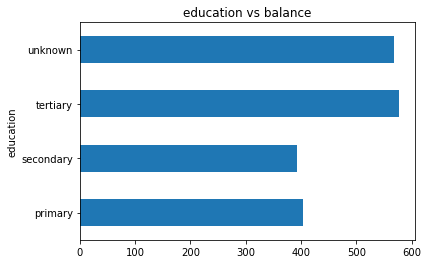

In [13]:
df.groupby(['education'])['balance'].median().plot.barh()
plt.title('education vs balance')

tertiary having highest median

<AxesSubplot:>

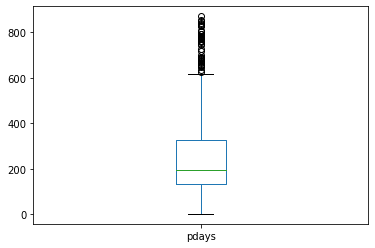

In [14]:
npdays.pdays.plot.box()

<AxesSubplot:xlabel='pdays'>

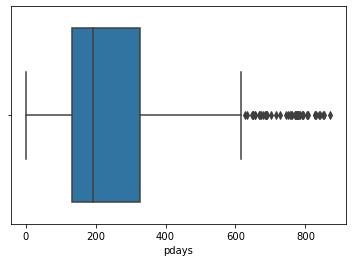

In [15]:
sns.boxplot(npdays.pdays)

So there are we see outliers are present

In [16]:
sum((npdays.pdays)>600)

52

In [17]:
npdays[(npdays.pdays)>600].index

Int64Index([43034, 43368, 43404, 43507, 43586, 43727, 43848, 43884, 43887,
            43964, 43983, 44038, 44052, 44089, 44120, 44243, 44251, 44260,
            44287, 44446, 44489, 44496, 44530, 44546, 44570, 44604, 44667,
            44683, 44698, 44711, 44754, 44785, 44798, 44815, 44822, 44829,
            44832, 44837, 44840, 44858, 44864, 44865, 44906, 44924, 44960,
            44965, 44974, 45024, 45036, 45037, 45120, 45146],
           dtype='int64')

In [18]:
npdays.drop(index=npdays[(npdays.pdays)>600].index,inplace=True)

In [19]:
sum((npdays.pdays)>600)

0

The final goal is to make a predictive model to predict if the customer will respond positively to the 
campaign or not. The target variable is “response”.
First, perform bi-variate analysis to identify the features that are directly associated with the target 
variable. You can refer to the notebook we used for the EDA discussion.

- Convert the response variable to a convenient form


In [20]:
npdays.response.value_counts()

no     6319
yes    1886
Name: response, dtype: int64

In [21]:
npdays.response.value_counts(normalize=True)

no     0.77014
yes    0.22986
Name: response, dtype: float64

In [22]:
datamapping={'yes':1,'no':0}

In [23]:
npdays.response=npdays.response.map(datamapping)

In [24]:
npdays.head()

,age,job,salary,marital,education,targeted,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,response
24060,33,admin.,50000,married,tertiary,yes,no,882,no,no,telephone,21,oct,39,1,151,3,failure,0
24062,42,admin.,50000,single,secondary,yes,no,-247,yes,yes,telephone,21,oct,519,1,166,1,other,1
24064,33,services,70000,married,secondary,yes,no,3444,yes,no,telephone,21,oct,144,1,91,4,failure,1
24072,36,management,100000,married,tertiary,yes,no,2415,yes,no,telephone,22,oct,73,1,86,4,other,0
24077,36,management,100000,married,tertiary,yes,no,0,yes,no,telephone,23,oct,140,1,143,3,failure,1


In [25]:
npdays.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8205 entries, 24060 to 45210
Data columns (total 19 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        8205 non-null   int64 
 1   job        8205 non-null   object
 2   salary     8205 non-null   int64 
 3   marital    8205 non-null   object
 4   education  8205 non-null   object
 5   targeted   8205 non-null   object
 6   default    8205 non-null   object
 7   balance    8205 non-null   int64 
 8   housing    8205 non-null   object
 9   loan       8205 non-null   object
 10  contact    8205 non-null   object
 11  day        8205 non-null   int64 
 12  month      8205 non-null   object
 13  duration   8205 non-null   int64 
 14  campaign   8205 non-null   int64 
 15  pdays      8205 non-null   int64 
 16  previous   8205 non-null   int64 
 17  poutcome   8205 non-null   object
 18  response   8205 non-null   int64 
dtypes: int64(9), object(10)
memory usage: 1.3+ MB


In [26]:
obj_col=[]
num_col=[]
for i in npdays.columns:
    if npdays[i].dtype=='O':
        obj_col.append(i)
    else:
        num_col.append(i)
    

In [27]:
print('catogerical variable',obj_col)
print('numerical varibale',num_col)

catogerical variable ['job', 'marital', 'education', 'targeted', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome']
numerical varibale ['age', 'salary', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous', 'response']


- Make suitable plots for associations with numerical features and categorical features’

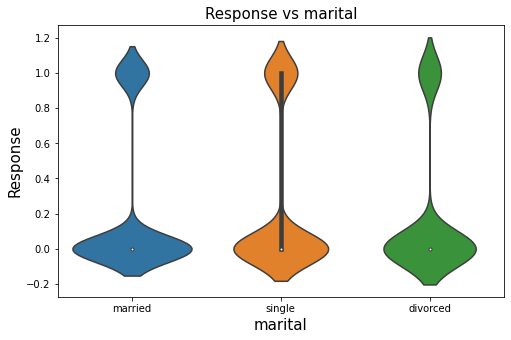

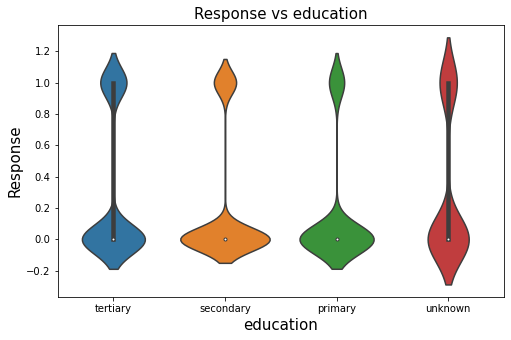

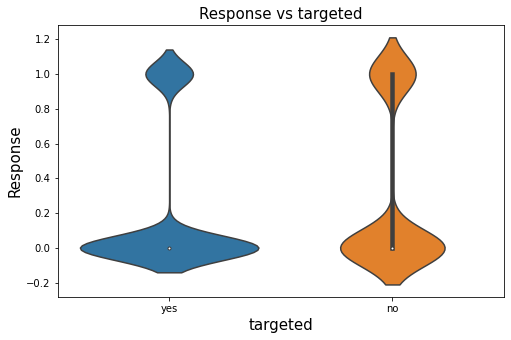

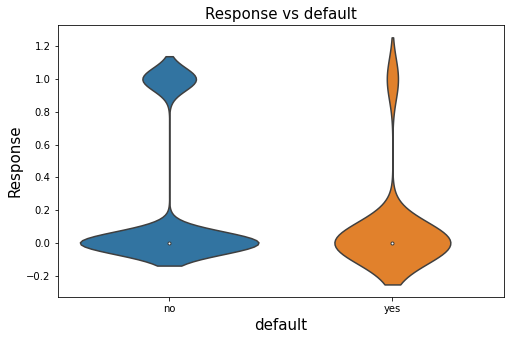

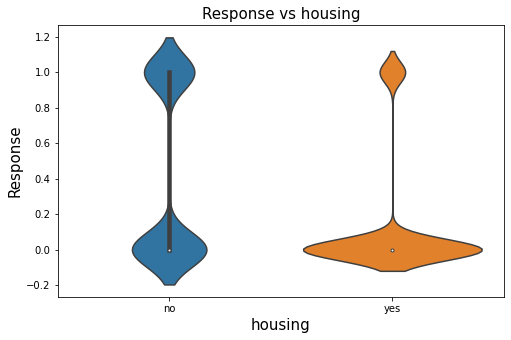

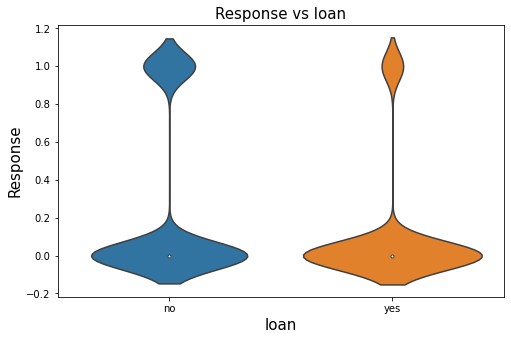

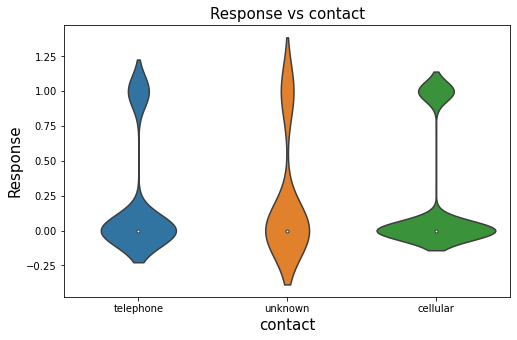

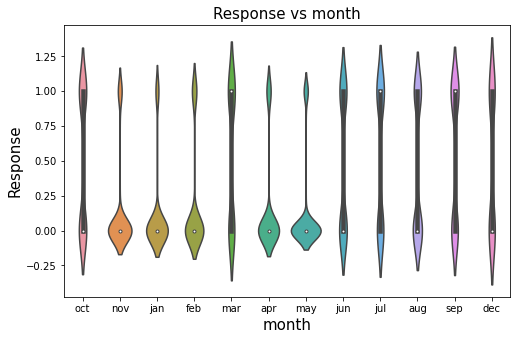

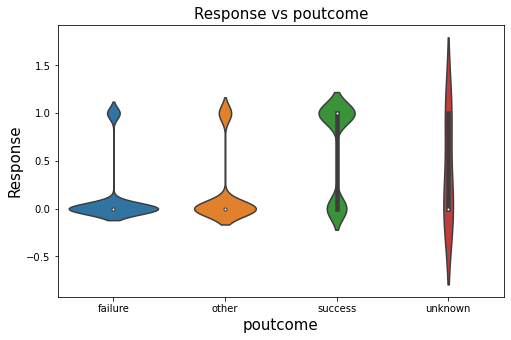

In [93]:
for i in obj_col[1:]:
    plt.figure(figsize=(8,5))
    sns.violinplot(npdays[i],npdays['response'])
    plt.title('Response vs '+i,fontsize=15)
    plt.xlabel(i,fontsize=15)
    plt.ylabel('Response',fontsize=15)
    plt.show()

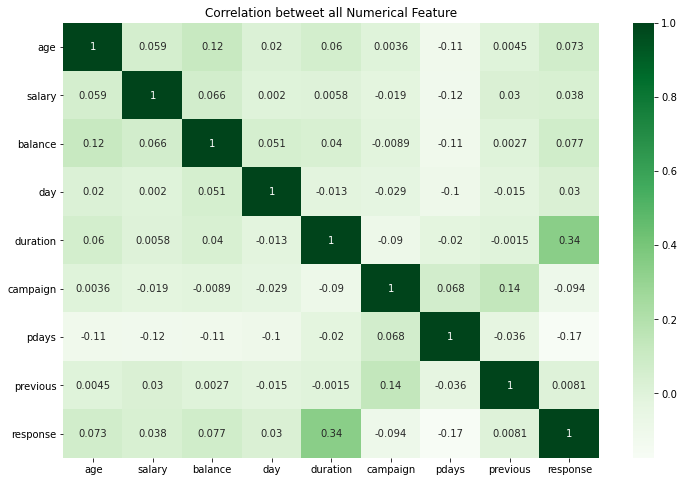

In [29]:
plt.figure(figsize=(12,8))
sns.heatmap(npdays.corr(),annot=True,cmap='Greens')
plt.title("Correlation betweet all Numerical Feature")
plt.show()

<Figure size 576x360 with 0 Axes>

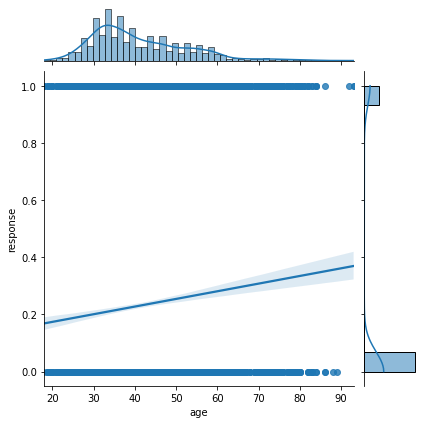

<Figure size 576x360 with 0 Axes>

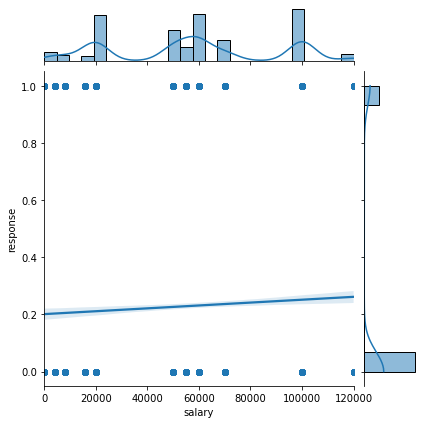

<Figure size 576x360 with 0 Axes>

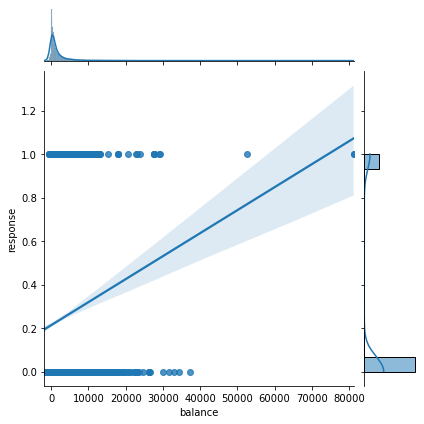

<Figure size 576x360 with 0 Axes>

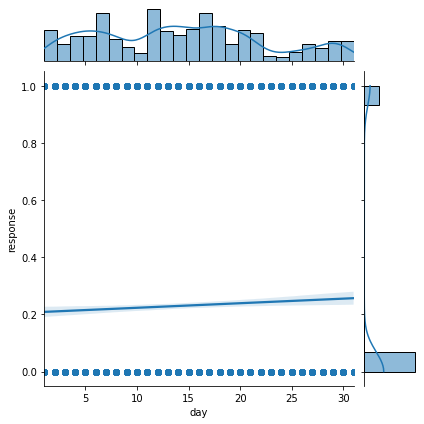

<Figure size 576x360 with 0 Axes>

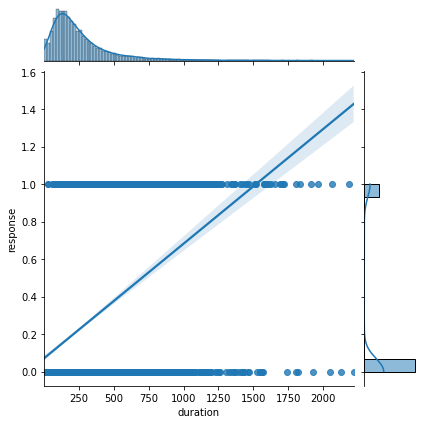

<Figure size 576x360 with 0 Axes>

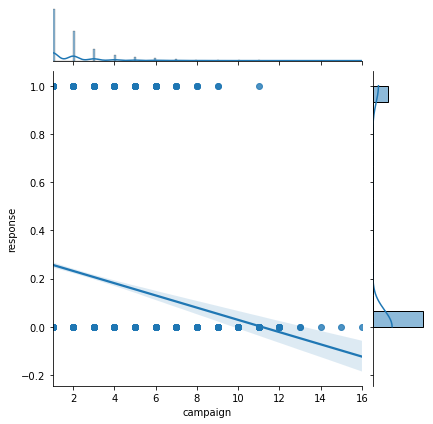

<Figure size 576x360 with 0 Axes>

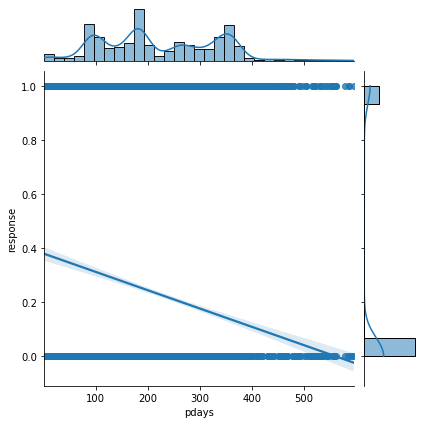

<Figure size 576x360 with 0 Axes>

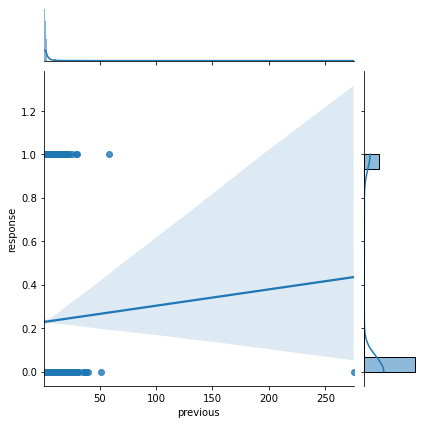

In [30]:
for i in num_col[:-1]:
    plt.figure(figsize=(8,5))
    sns.jointplot(x=npdays[i],y=npdays['response'],kind='reg')
    plt.xlabel(i)
    plt.ylabel('response')
    plt.show()

Before the predictive modeling part, make sure to perform – 
- The necessary transformations for the categorical variables and the numeric variables
- Handle variables corresponding to the previous campaign
- Train test split

In [31]:
#convert categorical variable into numeric variable
from sklearn.preprocessing import LabelEncoder
lab=npdays[obj_col].apply(LabelEncoder().fit_transform)
lab

,job,marital,education,targeted,default,housing,loan,contact,month,poutcome
24060,0,1,2,1,0,0,0,1,10,0
24062,0,2,1,1,0,1,1,1,10,1
24064,7,1,1,1,0,1,0,1,10,0
24072,4,1,2,1,0,1,0,1,10,1
24077,4,1,2,1,0,1,0,1,10,0
...,...,...,...,...,...,...,...,...,...,...
45199,1,2,1,1,0,1,0,0,9,1
45201,4,1,2,1,0,0,0,0,9,2
45204,5,1,1,1,0,0,0,0,9,0
45208,5,1,1,1,0,0,0,0,9,2


In [32]:
dfnew=lab.join(npdays[num_col])
dfnew

,job,marital,education,targeted,default,housing,loan,contact,month,poutcome,age,salary,balance,day,duration,campaign,pdays,previous,response
24060,0,1,2,1,0,0,0,1,10,0,33,50000,882,21,39,1,151,3,0
24062,0,2,1,1,0,1,1,1,10,1,42,50000,-247,21,519,1,166,1,1
24064,7,1,1,1,0,1,0,1,10,0,33,70000,3444,21,144,1,91,4,1
24072,4,1,2,1,0,1,0,1,10,1,36,100000,2415,22,73,1,86,4,0
24077,4,1,2,1,0,1,0,1,10,0,36,100000,0,23,140,1,143,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45199,1,2,1,1,0,1,0,0,9,1,34,20000,1475,16,1166,3,530,12,0
45201,4,1,2,1,0,0,0,0,9,2,53,100000,583,17,226,1,184,4,1
45204,5,1,1,1,0,0,0,0,9,0,73,55000,2850,17,300,1,40,8,1
45208,5,1,1,1,0,0,0,0,9,2,72,55000,5715,17,1127,5,184,3,1


In [33]:
dfnew.corr()

,job,marital,education,targeted,default,housing,loan,contact,month,poutcome,age,salary,balance,day,duration,campaign,pdays,previous,response
job,1.000000,0.072865,0.159377,-0.091083,-0.021111,-0.132182,-0.033795,0.000723,-0.002806,0.066452,-0.020727,0.115646,0.041900,0.014952,0.023745,-0.009013,-0.116824,-0.000903,0.079660
marital,0.072865,1.000000,0.122070,-0.255486,-0.005753,-0.056352,-0.055374,-0.028908,-0.024663,0.045484,-0.415511,-0.043422,-0.020178,0.016389,-0.009392,-0.008772,-0.006392,0.005519,0.049751
education,0.159377,0.122070,1.000000,-0.632761,-0.013600,-0.127906,-0.048812,-0.050515,-0.012213,0.083959,-0.120713,0.422500,0.074225,0.023110,-0.001378,-0.024108,-0.157076,0.000963,0.108581
targeted,-0.091083,-0.255486,-0.632761,1.000000,0.019620,0.086574,0.070190,0.024672,0.011374,-0.071648,0.141069,-0.227927,-0.052601,-0.025070,-0.016042,0.017189,0.084503,-0.002387,-0.092791
default,-0.021111,-0.005753,-0.013600,0.019620,1.000000,0.022611,0.052473,-0.019521,0.020435,-0.025767,-0.027905,0.000392,-0.045128,-0.000964,-0.002728,-0.002308,0.038702,0.012505,-0.028256
housing,-0.132182,-0.056352,-0.127906,0.086574,0.022611,1.000000,0.112240,-0.072051,0.017032,-0.287046,-0.179517,-0.034703,-0.109598,-0.067401,-0.072505,0.062326,0.365964,0.007706,-0.320280
loan,-0.033795,-0.055374,-0.048812,0.070190,0.052473,0.112240,1.000000,-0.028964,-0.000715,-0.103648,-0.009009,0.014393,-0.084921,0.008988,-0.032730,0.008033,0.022819,0.013683,-0.115212
contact,0.000723,-0.028908,-0.050515,0.024672,-0.019521,-0.072051,-0.028964,1.000000,0.041944,0.024316,0.175935,-0.035471,0.038262,-0.012872,-0.023321,0.077261,0.012072,0.037374,-0.007714
month,-0.002806,-0.024663,-0.012213,0.011374,0.020435,0.017032,-0.000715,0.041944,1.000000,-0.018198,0.014876,0.018868,0.016244,-0.024655,-0.034737,0.024708,0.010131,0.012016,-0.009015
poutcome,0.066452,0.045484,0.083959,-0.071648,-0.025767,-0.287046,-0.103648,0.024316,-0.018198,1.000000,0.052255,0.013536,0.051497,0.016912,0.110449,-0.001180,-0.243675,0.042900,0.425229


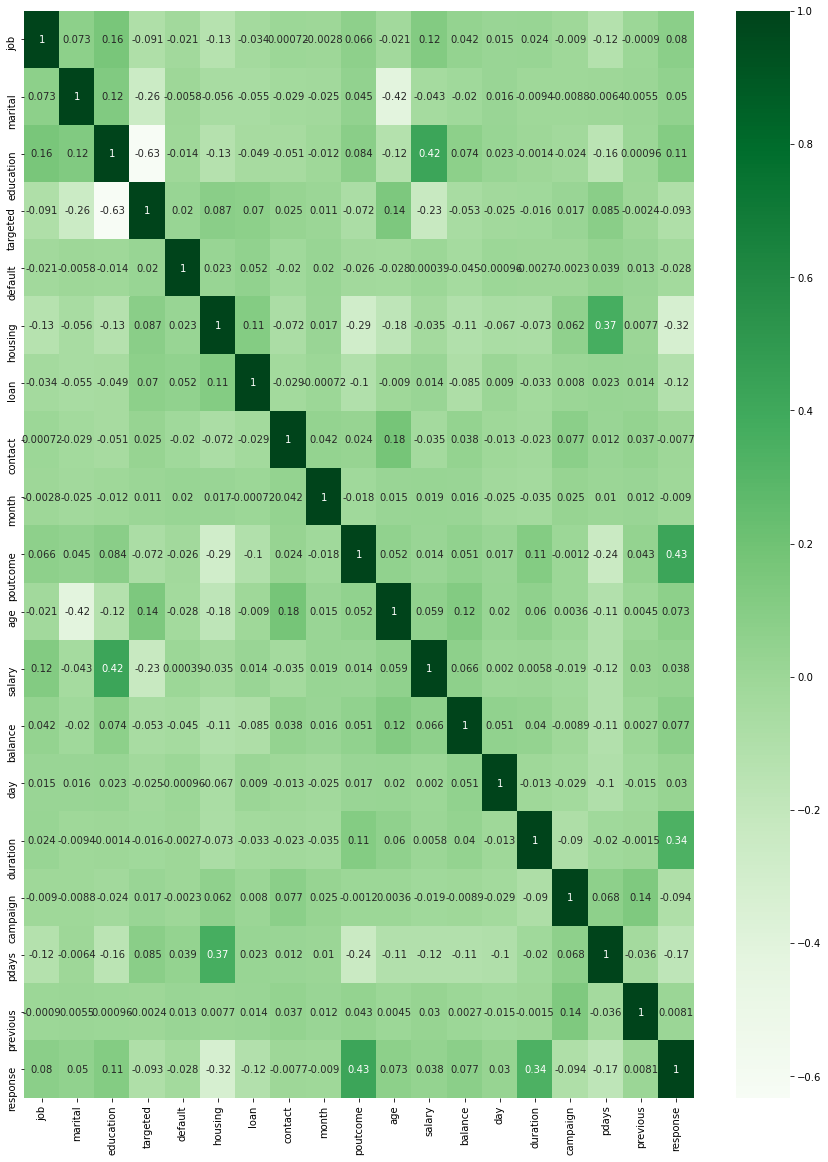

In [34]:
plt.figure(figsize=(15,20))
sns.heatmap(dfnew.corr(),annot=True,cmap='Greens')
plt.show()

# Train Test split

In [35]:
x=dfnew.drop('response',axis=1)
y=dfnew['response']

In [36]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=101)


In [37]:
x_train.head()

,job,marital,education,targeted,default,housing,loan,contact,month,poutcome,age,salary,balance,day,duration,campaign,pdays,previous
26115,6,0,2,0,0,1,0,0,9,1,46,60000,926,19,168,2,153,1
39249,7,2,1,1,0,1,0,0,8,1,30,70000,177,18,187,4,356,2
44368,4,1,1,1,0,0,0,0,1,0,34,100000,369,2,868,3,342,4
35956,5,1,2,1,0,1,1,0,8,1,59,55000,148,8,685,2,366,1
44975,4,2,2,0,0,0,0,0,10,2,30,100000,502,11,463,3,95,6


In [38]:
x_test.head()

,job,marital,education,targeted,default,housing,loan,contact,month,poutcome,age,salary,balance,day,duration,campaign,pdays,previous
41896,0,1,1,1,0,0,0,0,10,0,61,50000,1541,20,59,1,104,3
38078,1,1,0,1,0,0,0,0,8,0,48,20000,430,14,340,3,371,8
43453,1,2,3,0,0,0,0,0,0,0,35,20000,484,12,143,2,186,1
42168,9,1,1,1,0,1,0,0,9,2,24,60000,556,6,368,2,80,2
35641,4,1,2,1,0,1,0,0,8,0,31,100000,-181,8,127,1,170,2


In [39]:
y_train.head()

26115    0
39249    0
44368    1
35956    1
44975    1
Name: response, dtype: int64

In [40]:
y_test.head()

41896    0
38078    0
43453    0
42168    1
35641    0
Name: response, dtype: int64

# LogisticRegression

- Make a predictive model using logistic regression

In [41]:
from sklearn.linear_model import LogisticRegression

In [42]:
lr=LogisticRegression()

In [43]:
from sklearn.metrics import classification_report,confusion_matrix,f1_score

In [44]:
from sklearn.model_selection import cross_val_score

In [45]:
lr.fit(x_train,y_train)

LogisticRegression()

In [46]:
y_pred=lr.predict(x_test)

In [47]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.81      0.96      0.88      1286
           1       0.54      0.18      0.27       355

    accuracy                           0.79      1641
   macro avg       0.67      0.57      0.57      1641
weighted avg       0.75      0.79      0.75      1641



In [48]:
confusion_matrix(y_pred,y_test)

array([[1230,  290],
       [  56,   65]], dtype=int64)

- Use RFE to select top n features in an automated fashion (choose n as you see fit)

Recursive Feature Elimination

In [49]:
from sklearn.feature_selection import RFE


In [50]:
rfe=RFE(lr,5)
rfe.fit(x_train,y_train)

RFE(estimator=LogisticRegression(), n_features_to_select=5)

In [51]:
rfe.support_

array([False, False,  True, False,  True,  True,  True, False, False,
        True, False, False, False, False, False, False, False, False])

In [52]:
x_train.columns[rfe.support_]

Index(['education', 'default', 'housing', 'loan', 'poutcome'], dtype='object')

In [53]:
col=x_train.columns[rfe.support_]

In [54]:
lr.fit(x_train[col],y_train)

LogisticRegression()

In [55]:
y_pr=lr.predict(x_test[col])

In [56]:
print(classification_report(y_pr,y_test))

              precision    recall  f1-score   support

           0       0.94      0.86      0.90      1412
           1       0.44      0.68      0.53       229

    accuracy                           0.83      1641
   macro avg       0.69      0.77      0.71      1641
weighted avg       0.87      0.83      0.85      1641



In [57]:
f1_score(y_pr,y_test)

0.5308219178082192

In [58]:
confusion_matrix(y_pr,y_test)

array([[1212,  200],
       [  74,  155]], dtype=int64)

# Use stats model

In [59]:
import statsmodels.api as sm

In [60]:
x_train.head()

,job,marital,education,targeted,default,housing,loan,contact,month,poutcome,age,salary,balance,day,duration,campaign,pdays,previous
26115,6,0,2,0,0,1,0,0,9,1,46,60000,926,19,168,2,153,1
39249,7,2,1,1,0,1,0,0,8,1,30,70000,177,18,187,4,356,2
44368,4,1,1,1,0,0,0,0,1,0,34,100000,369,2,868,3,342,4
35956,5,1,2,1,0,1,1,0,8,1,59,55000,148,8,685,2,366,1
44975,4,2,2,0,0,0,0,0,10,2,30,100000,502,11,463,3,95,6


In [61]:
x_train_sm=sm.add_constant(x_train[col])

In [62]:
x_train_sm.head()

,const,education,default,housing,loan,poutcome
26115,1.0,2,0,1,0,1
39249,1.0,1,0,1,0,1
44368,1.0,1,0,0,0,0
35956,1.0,2,0,1,1,1
44975,1.0,2,0,0,0,2


In [63]:
model=sm.GLM(y_train,x_train_sm,family=sm.families.Binomial()).fit()

In [64]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:               response   No. Observations:                 6564
Model:                            GLM   Df Residuals:                     6558
Model Family:                Binomial   Df Model:                            5
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2842.9
Date:                Thu, 27 Jan 2022   Deviance:                       5685.8
Time:                        20:52:42   Pearson chi2:                 6.81e+03
No. Iterations:                     5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.6710      0.090    -18.647      0.000      -1.847      -1.495
education      0.2341      0.046      5.131      0.000       0.145       0.324
default       -0.4841      0.490     -0.989      0.323      -1.444       0.475
housing       -1.0822      0.068    -15.964      0.000      -1.215      -0.949
loan          -0.4938      0.116     -4.250      0.000      -0.722      -0.266
poutcome       1.0521      0.040     25.980      0.000       0.973       1.131
==============================================================================
"""

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.

- Using p values and VIF, get rid of the redundant features

# VIF

In [65]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [66]:
vif = pd.DataFrame()
vif['Features'] = x_train.columns
vif['VIF'] = [variance_inflation_factor(x_train.values, i) for i in range(x_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
10,age,11.76
3,targeted,6.50
2,education,6.39
16,pdays,5.80
11,salary,5.33
1,marital,4.41
13,day,4.09
8,month,3.58
5,housing,3.28
0,job,2.93


- Estimate the model performance using k fold cross validation

# Use cross validation

In [67]:
#use cross validation 
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score

cv=ShuffleSplit(n_splits=5,test_size=0.2,random_state=0)

cross_val_score(LogisticRegression(),x,y,cv=cv)

array([0.79402803, 0.79098111, 0.77696527, 0.79341865, 0.77818403])

after performing cross validation we got score 78%

In [68]:
print(classification_report(y_test,y_pr))

              precision    recall  f1-score   support

           0       0.86      0.94      0.90      1286
           1       0.68      0.44      0.53       355

    accuracy                           0.83      1641
   macro avg       0.77      0.69      0.71      1641
weighted avg       0.82      0.83      0.82      1641



In [69]:
x_train_sm.head()

,const,education,default,housing,loan,poutcome
26115,1.0,2,0,1,0,1
39249,1.0,1,0,1,0,1
44368,1.0,1,0,0,0,0
35956,1.0,2,0,1,1,1
44975,1.0,2,0,0,0,2


which features are most important from your model

So, here we can see that const,education, default,housing,loan,poutcome are important features



# Random Forest

- Make a predictive model using random forest technique

In [70]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score,accuracy_score,classification_report

In [71]:
rfc=RandomForestClassifier(n_estimators=40,max_depth=5)

In [72]:
rfc.fit(x_train,y_train)

RandomForestClassifier(max_depth=5, n_estimators=40)

In [73]:
y_pred_rfc=rfc.predict(x_test)

In [74]:
rfc.score(x_test,y_test)

0.8488726386349786

In [75]:
print(classification_report(y_test,y_pred_rfc))

              precision    recall  f1-score   support

           0       0.87      0.95      0.91      1286
           1       0.73      0.48      0.58       355

    accuracy                           0.85      1641
   macro avg       0.80      0.72      0.74      1641
weighted avg       0.84      0.85      0.84      1641



In [76]:
f1_score(y_test,y_pred_rfc)

0.5796610169491526

In [77]:
confusion_matrix(y_test,y_pred_rfc)

array([[1222,   64],
       [ 184,  171]], dtype=int64)

# Cross Validation

Estimate the model performance using k fold cross validation

In [78]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score

cv=ShuffleSplit(n_splits=5,test_size=0.2,random_state=0)

cross_val_score(RandomForestClassifier(),x,y,cv=cv)

array([0.84216941, 0.84156002, 0.83607556, 0.85618525, 0.84704449])

In [79]:
np.mean(cross_val_score(RandomForestClassifier(),x,y,cv=cv))

0.8455819622181597

after solving cross validation we get the score is 84% as above

In [80]:
print(classification_report(y_test,y_pred_rfc))

              precision    recall  f1-score   support

           0       0.87      0.95      0.91      1286
           1       0.73      0.48      0.58       355

    accuracy                           0.85      1641
   macro avg       0.80      0.72      0.74      1641
weighted avg       0.84      0.85      0.84      1641



# RFE

In [81]:
from sklearn.feature_selection import RFE

In [82]:
rfer=RFE(rfc,5)
rfer.fit(x_train,y_train)

RFE(estimator=RandomForestClassifier(max_depth=5, n_estimators=40),
    n_features_to_select=5)

In [83]:
rfer.support_

array([False, False, False, False, False,  True, False, False,  True,
        True, False, False, False, False,  True, False,  True, False])

In [84]:
column=x_train.columns[rfer.support_]

In [85]:
rfc.fit(x_train[column],y_train)

RandomForestClassifier(max_depth=5, n_estimators=40)

In [86]:
y_predi=rfc.predict(x_test[column])

In [87]:
f1_score(y_predi,y_test)

0.6091205211726385

- Using the feature importance values from the Random Forest module, identify the most 
important features for the model

In [88]:
x_train.columns[rfer.support_]

Index(['housing', 'month', 'poutcome', 'duration', 'pdays'], dtype='object')

here we can see that housing,month,poutcome,duration,pdays are important features

# Compare the performance of the Random Forest and the logistic model

- Evaluate both models on the test set
- Which metric did you choose and why?
- Which model has better performance on the test set?

In [89]:
#accuracy score for logistic regression
accuracy_score(y_test,y_pred)


0.7891529555149299

In [90]:
#accuracy score for Random Forest
accuracy_score(y_test,y_pred_rfc)

0.8488726386349786

So,here we can see that random forest has better score so we will choosing Random Forest Model

# - Compare the feature importance from the different models – do they agree? Are the top features similar in both models?


In [91]:
#check features for Logistic regression
x_train.columns[rfe.support_]

Index(['education', 'default', 'housing', 'loan', 'poutcome'], dtype='object')

In [92]:
#check features for Random Forest
x_train.columns[rfer.support_]

Index(['housing', 'month', 'poutcome', 'duration', 'pdays'], dtype='object')

So,here we can see that both the model has same features